In [182]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

#reading in data
populationDemographics = pd.read_csv('../../data/clean/population_demographics.csv')
populationDemographics


,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,111,49,4169,275,0,155,0,0,139,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,58,60,4546,78,0,42,0,168,183,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,144,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,3058,9849.455,1525,1533,12,11,...,38,0,2075,330,0,457,0,46,150,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,7952,44222.540,3377,4575,208,306,...,425,109,4729,536,0,1864,0,427,396,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,8984,70236.120,4502,4482,258,26,...,32,0,5542,174,0,2757,0,228,283,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,5613,24655.630,2697,2916,288,241,...,181,0,3476,276,17,1352,0,102,390,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


In [183]:

raceOnly = populationDemographics[['geoid','geometry','qualifying name', 'total population', 'total population: white alone', 
                                   'total population: black or african american alone',
                                   'total population: american indian and alaska native alone',
                                   'total population: asian alone', 
                                   'total population: native hawaiian and other pacific islander alone', 
                                   'total population: some other race alone', 
                                   'total population: two or more races']]


Text(0.5, 1.0, 'Percent Black per Census Tract')

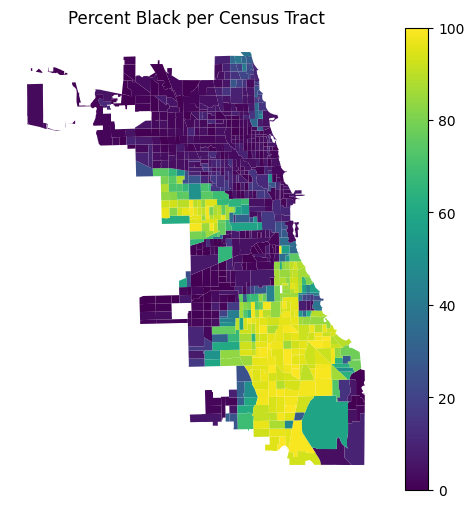

In [188]:
blackRaceOnly = raceOnly.copy(deep=True)
blackRaceOnly['percent black'] = (blackRaceOnly['total population: black or african american alone']/blackRaceOnly['total population'])*100

blackRaceOnly = gpd.GeoDataFrame(
    blackRaceOnly.loc[:, [c for c in blackRaceOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(blackRaceOnly["geometry"]),
    crs="epsg:4326",
    )

#plt.show()
#blackRaceOnly.plot(column='percent black', legend=True)

fig, ax = plt.subplots(1, figsize=(6, 6))
blackRaceOnly.plot(column='percent black', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent Black per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Percent Asian per Census Tract')

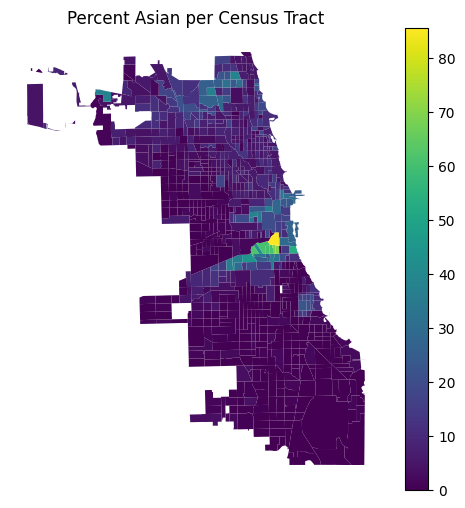

In [187]:
asianRaceOnly = raceOnly.copy(deep=True)
asianRaceOnly['percent asian'] = (asianRaceOnly['total population: asian alone']/asianRaceOnly['total population'])*100

asianRaceOnly = gpd.GeoDataFrame(
    asianRaceOnly.loc[:, [c for c in asianRaceOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(asianRaceOnly["geometry"]),
    crs="epsg:4326",
    )

#plt.show()
#asianRaceOnly.plot(column='percent asian', legend=True, )

fig, ax = plt.subplots(1, figsize=(6, 6))
asianRaceOnly.plot(column='percent asian', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent Asian per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

In [177]:
populousRace = raceOnly.copy(deep=True)
mostPopulousRace = []
    
for index, row in populousRace.iterrows():
    count = row['total population: black or african american alone']
    race = 'black'
    if row['total population: american indian and alaska native alone']>count:
        count = row['total population: american indian and alaska native alone']
        race = 'american native'
    elif row['total population: asian alone']>count:
        count = row['total population: asian alone']
        race = 'asian'
    elif row['total population: native hawaiian and other pacific islander alone']>count:
        count = row['total population: native hawaiian and other pacific islander alone']
        race = 'native pacific islander'
    elif row['total population: some other race alone']>count:
        count = row['total population: some other race alone']
        race = 'other'
    elif row['total population: two or more races']>count:
        count = row['total population: two or more races']
        race = 'two or more races'
        
    mostPopulousRace.append(race)
#print(mostPopulousRace)

populousRace['most populous race']= mostPopulousRace

Text(0.5, 1.0, 'Most Populous Race by Census Tract')

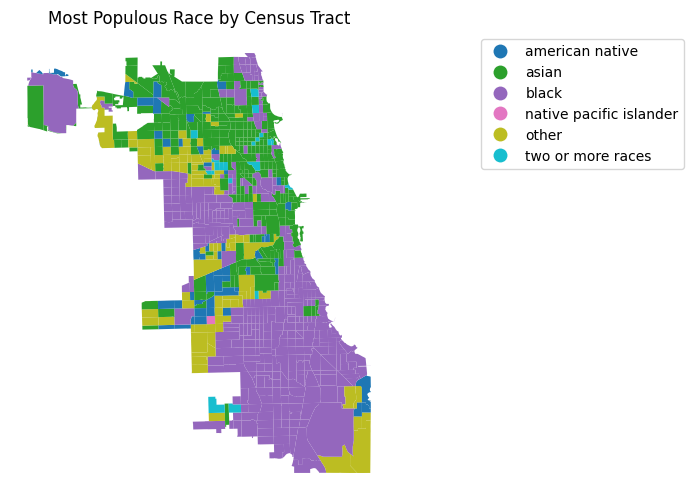

In [178]:
populousRace = gpd.GeoDataFrame(
    populousRace.loc[:, [c for c in populousRace.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(populousRace["geometry"]),
    crs="epsg:4326",
    )

#plt.show()
#populousRace.plot("most populous race", legend = True, legend_kwds={'bbox_to_anchor': (1.8, 1)})

fig, ax = plt.subplots(1, figsize=(10, 6))
populousRace.plot("most populous race", legend = True, legend_kwds={'bbox_to_anchor': (1.8, 1)}, ax=ax)
ax.axis('off')
ax.set_title('Most Populous Race by Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})